<a href="https://colab.research.google.com/github/caevalareti/data-science-projects/blob/master/london_insights.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objects as go
import geopandas as gpd
from geopy import Nominatim
from functools import reduce

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

#plt.style.use('seaborn')
#plt.rcParams['figure.figsize'] = [18, 11]

In [ ]:
df = pd.read_csv("/home/carlos/Desktop/airbnb-london/listings.csv")
london_df = gpd.read_file('/home/carlos/Desktop/airbnb-london/neighbourhoods.geojson')

In [ ]:
df.head(10)

id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  15400                Bright Chelsea  Apartment. Chelsea!    60302   
3  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
4  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
5  25123                  Clean big Room in London (Room 1)   103583   
6  33332     Beautiful Ensuite Richmond-upon-Thames borough   144444   
7  36299                Kew Gardens 3BR house in cul-de-sac   155938   
8  36660                    You are GUARANTEED to love this   157884   
9  36986  Gorgeous Victorian Flat Overlooking London Fields   159556   

      host_name  neighbourhood_group           neighbourhood  latitude  \
0       Adriano                  NaN                 Lambeth  51.46225   
1         Alina                  NaN               Islington  51.56802   
2      Philippa                  NaN  Kensington and Chelsea  51.48796   
3           Liz                  NaN             Westminster  51.52195   
4     Charlotte                  NaN  Hammersmith and Fulham  51.47935   
5         Grace                  NaN                  Barnet  51.57224   
6       Chi-Chi                  NaN                Hounslow  51.46507   
7         Geert                  NaN    Richmond upon Thames  51.47934   
8  Agri & Roger                  NaN                Haringey  51.58461   
9       Michael                  NaN                 Hackney  51.53972   

   longitude        room_type  price  minimum_nights  number_of_reviews  \
0   -0.11732  Entire home/apt    105               2                192   
1   -0.11121     Private room     40               1                 21   
2   -0.16898  Entire home/apt     75              10                 89   
3   -0.14094  Entire home/apt    307               4                 42   
4   -0.19743     Private room    150               3                  0   
5   -0.20906     Private room     29              10                129   
6   -0.32421     Private room     65               1                  6   
7   -0.28066  Entire home/apt    195               3                 79   
8   -0.16170     Private room     72               2                528   
9   -0.05885  Entire home/apt     80               6                 52   

  last_review  reviews_per_month  calculated_host_listings_count  \
0  2020-03-26               1.46                               2   
1  2020-02-22               0.17                               2   
2  2020-03-16               0.66                               1   
3  2019-11-02               0.35                              15   
4         NaN                NaN                               2   
5  2020-03-15               0.99                               3   
6  2020-03-08               0.05                               1   
7  2020-08-31               0.64                               1   
8  2020-02-17               4.23                               1   
9  2019-03-30               0.41                               2   

   availability_365  
0               338  
1               365  
2               189  
3               231  
4               364  
5                 2  
6               364  
7               322  
8               363  
9                90

In [ ]:
#dataset size
print(f'Number of entries: \t {df.shape[0]}')
print(f'Number of features: \t {df.shape[1]}')

#show first entries
display(df.dtypes)

Number of entries: 	 77136
Number of features: 	 16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

In [ ]:
#checking missing data
(round(df.isnull().sum() / df.shape[0] * 100,5)).sort_values(ascending=False)

neighbourhood_group               100.00000
last_review                        29.07981
reviews_per_month                  29.07981
host_name                           0.05315
name                                0.03111
id                                  0.00000
host_id                             0.00000
neighbourhood                       0.00000
latitude                            0.00000
longitude                           0.00000
room_type                           0.00000
price                               0.00000
minimum_nights                      0.00000
number_of_reviews                   0.00000
calculated_host_listings_count      0.00000
availability_365                    0.00000
dtype: float64

In [ ]:
#dropping out columns that are not significant for further exploration
df.drop(['neighbourhood_group', 'reviews_per_month', 'last_review'], axis=1, inplace=True)

#replacing all NaN values in 'reviews_per_month' with 0
df.fillna({'reviews_per_month': 0}, inplace=True)

#examining the changes
df.head(10)

id                                               name  host_id  \
0  11551         Arty and Bright London Apartment in Zone 2    43039   
1  13913                Holiday London DB Room Let-on going    54730   
2  15400                Bright Chelsea  Apartment. Chelsea!    60302   
3  17402              Superb 3-Bed/2 Bath & Wifi: Trendy W1    67564   
4  17506  Boutique Chelsea/Fulham Double bed 5-star ensuite    67915   
5  25123                  Clean big Room in London (Room 1)   103583   
6  33332     Beautiful Ensuite Richmond-upon-Thames borough   144444   
7  36299                Kew Gardens 3BR house in cul-de-sac   155938   
8  36660                    You are GUARANTEED to love this   157884   
9  36986  Gorgeous Victorian Flat Overlooking London Fields   159556   

      host_name           neighbourhood  latitude  longitude        room_type  \
0       Adriano                 Lambeth  51.46225   -0.11732  Entire home/apt   
1         Alina               Islington  51.56802   -0.11121     Private room   
2      Philippa  Kensington and Chelsea  51.48796   -0.16898  Entire home/apt   
3           Liz             Westminster  51.52195   -0.14094  Entire home/apt   
4     Charlotte  Hammersmith and Fulham  51.47935   -0.19743     Private room   
5         Grace                  Barnet  51.57224   -0.20906     Private room   
6       Chi-Chi                Hounslow  51.46507   -0.32421     Private room   
7         Geert    Richmond upon Thames  51.47934   -0.28066  Entire home/apt   
8  Agri & Roger                Haringey  51.58461   -0.16170     Private room   
9       Michael                 Hackney  51.53972   -0.05885  Entire home/apt   

   price  minimum_nights  number_of_reviews  calculated_host_listings_count  \
0    105               2                192                               2   
1     40               1                 21                               2   
2     75              10                 89                               1   
3    307               4                 42                              15   
4    150               3                  0                               2   
5     29              10                129                               3   
6     65               1                  6                               1   
7    195               3                 79                               1   
8     72               2                528                               1   
9     80               6                 52                               2   

   availability_365  
0               338  
1               365  
2               189  
3               231  
4               364  
5                 2  
6               364  
7               322  
8               363  
9                90

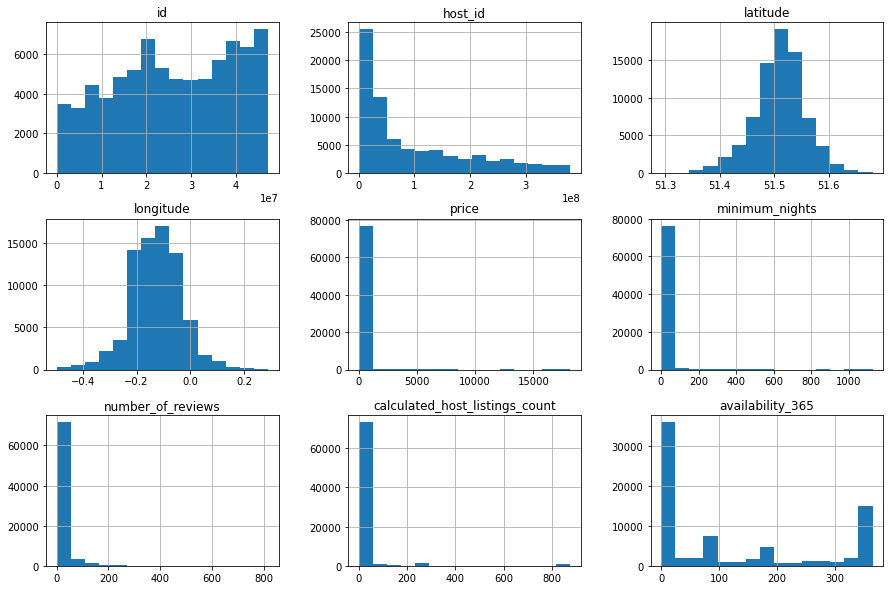

In [ ]:
#histogram
df.hist(bins=15, figsize=(15,10));

In [ ]:
#identifying and removing outliers
df[['price', 'minimum_nights', 'number_of_reviews',
    'calculated_host_listings_count', 'availability_365']].describe().round(1)

price  minimum_nights  number_of_reviews  \
count  77136.0         77136.0            77136.0   
mean     120.6             5.2               15.3   
std      412.5            22.4               35.4   
min        0.0             1.0                0.0   
25%       44.0             1.0                0.0   
50%       75.0             2.0                3.0   
75%      127.0             3.0               14.0   
max    18175.0          1125.0              817.0   

       calculated_host_listings_count  availability_365  
count                         77136.0           77136.0  
mean                             20.7             122.1  
std                              98.9             144.2  
min                               1.0               0.0  
25%                               1.0               0.0  
50%                               1.0              57.0  
75%                               4.0             262.0  
max                             874.0             365.0

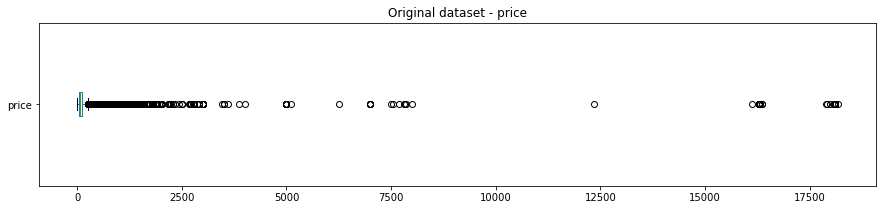

IQR price:  83.0
Upper limit:  251.5
Lower limit:  -80.5
5313 Entries above upper limit
6.89% of dataset


In [ ]:
#displaying the boxplot for price
fig, ax = plt.subplots(figsize=(15,3))
df['price'].plot(kind='box', vert=False)
ax.set_title('Original dataset - price')
plt.show()

#IQR rule for variable price
q1_price = df.price.quantile(q=0.25)
q3_price = df.price.quantile(q=0.75)
IQR_price = q3_price - q1_price

print('IQR price: ', IQR_price)

sup_price = q3_price + 1.5 * IQR_price
inf_price = q1_price - 1.5 * IQR_price

print('Upper limit: ', sup_price)
print('Lower limit: ', inf_price)

print("{} Entries above upper limit".format(len(df[df.price > sup_price])))
print("{:.2f}% of dataset".format((len(df[df.price > sup_price]) / df.shape[0])*100))

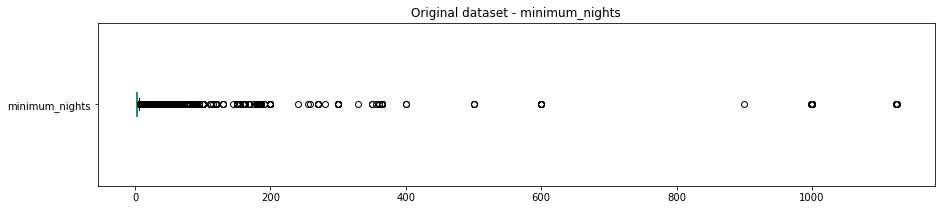

IQR minimum_nights:  2.0
Upper limit:  6.0
Lower limit:  -2.0
9575 Entries above upper limit
12.41% of dataset


In [ ]:
#displaying the boxplot for minimum_nights
fig, ax = plt.subplots(figsize=(15,3))
df['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Original dataset - minimum_nights')
plt.show()

#IQR rule for variable minimum_nights
q1_min = df.minimum_nights.quantile(q=0.25)
q3_min = df.minimum_nights.quantile(q=0.75)
IQR_min = q3_min - q1_min

print("IQR minimum_nights: ", IQR_min)

sup_min = q3_min + 1.5 * IQR_min
inf_min = q1_min - 1.5 * IQR_min

print('Upper limit: ', sup_min)
print('Lower limit: ', inf_min)

print("{} Entries above upper limit".format(len(df[df.minimum_nights > sup_min])))
print("{:.2f}% of dataset".format((len(df[df.minimum_nights > sup_min]) / df.shape[0])*100))

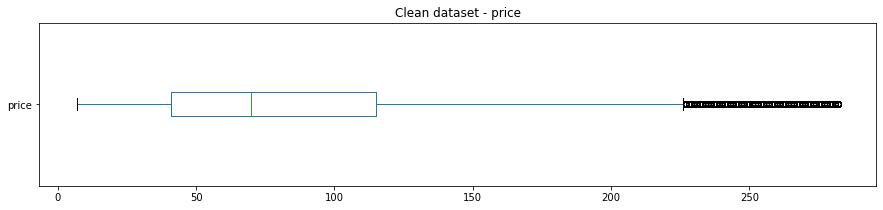

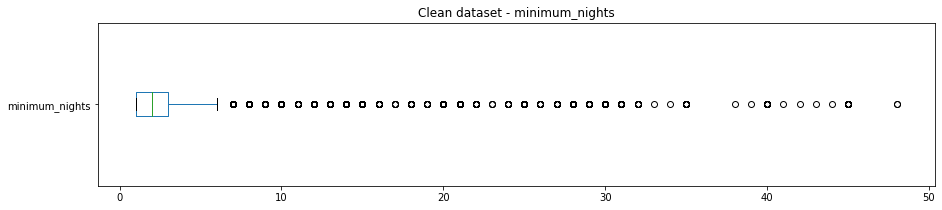

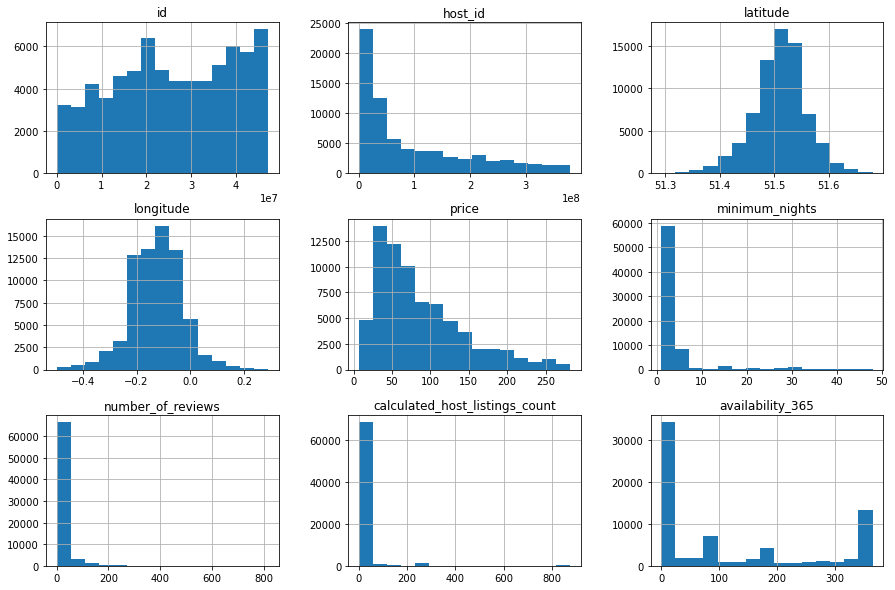

In [ ]:
#selecting the rows that fulfill the established requirements
df_clean = df[(df['price'] <= 282.5) & (df['price'] > 0) & (df['minimum_nights'] <= 48)].copy()

#plotting the boxplots again
fig, ax = plt.subplots(figsize=(15,3))
df_clean['price'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - price')
plt.show()

fig, ax = plt.subplots(figsize=(15,3))
df_clean['minimum_nights'].plot(kind='box', vert=False)
ax.set_title('Clean dataset - minimum_nights')
plt.show()

#plotting the histograms again
df_clean.hist(bins=15, figsize=(15,10));

In [ ]:
#checking correlations
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews',
                'calculated_host_listings_count', 'availability_365']].corr()

display(corr)

price  minimum_nights  number_of_reviews  \
price                           1.000000        0.027502          -0.068239   
minimum_nights                  0.027502        1.000000          -0.072349   
number_of_reviews              -0.068239       -0.072349           1.000000   
calculated_host_listings_count  0.214314       -0.038697          -0.053620   
availability_365                0.064332        0.028127           0.099246   

                                calculated_host_listings_count  \
price                                                 0.214314   
minimum_nights                                       -0.038697   
number_of_reviews                                    -0.053620   
calculated_host_listings_count                        1.000000   
availability_365                                      0.002440   

                                availability_365  
price                                   0.064332  
minimum_nights                          0.028127  
number_of_reviews                       0.099246  
calculated_host_listings_count          0.002440  
availability_365                        1.000000

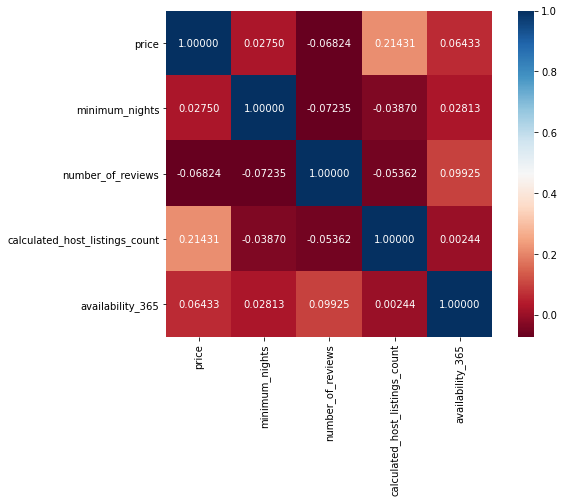

In [ ]:
sns.heatmap(corr, cmap='RdBu', fmt='.5f', square=True, linecolor='white', annot=True)

fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)  # scale current size by 1.5

In [ ]:
#number of listings by type of property
df_clean.room_type.value_counts()

Entire home/apt    37900
Private room       32724
Shared room          582
Hotel room           511
Name: room_type, dtype: int64

In [ ]:
#percentage of properties by type
room_per = df_clean.room_type.value_counts() / df_clean.shape[0] * 100
print(room_per)

Entire home/apt    52.846605
Private room       45.629349
Shared room         0.811523
Hotel room          0.712523
Name: room_type, dtype: float64


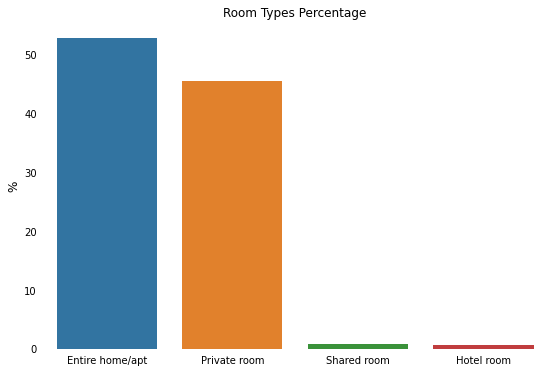

In [ ]:
#plotting the percentage of rooms for each room type
ax = sns.barplot(room_per.index, room_per)
ax.set_title('Room Types Percentage')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('%', fontsize=12)
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)  # scale current size by 1.5

In [ ]:
#calculating the average price per neighbourhood
q2_table = df_clean.groupby(['neighbourhood']).price.mean().round(2)
q2_table = q2_table.sort_values(ascending=False)[:10]

fig = go.Figure(data=[go.Table(
    header=dict(values=list(['Neighbourhood','Average Price']),
                fill_color='black',
                align='left'),
    cells=dict(values=[q2_table.index,q2_table],
               fill_color='white',
               align='left'))
])

fig.show()

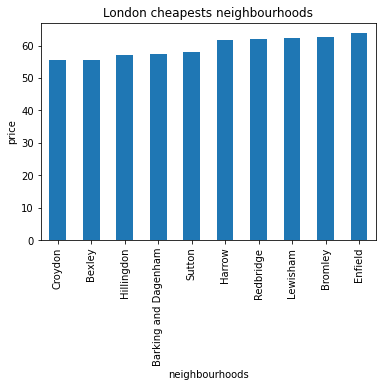

<Figure size 1440x720 with 0 Axes>

neighbourhood
Croydon                 55.530594
Bexley                  55.655556
Hillingdon              57.128289
Barking and Dagenham    57.387500
Sutton                  57.915789
Harrow                  61.658427
Redbridge               62.063158
Lewisham                62.436459
Bromley                 62.619546
Enfield                 63.793363
Waltham Forest          64.063657
Haringey                64.524384
Ealing                  68.854206
Havering                68.926641
Newham                  69.432387
Kingston upon Thames    71.442460
Barnet                  71.605499
Greenwich               75.086196
Brent                   75.668358
Hounslow                76.277048
Name: price, dtype: float64


In [ ]:
#show cheapest neighbourhoods
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:10].plot(kind='bar')
plt.title('London cheapests neighbourhoods')
plt.xlabel('neighbourhoods')
plt.ylabel('price')
plt.xticks(rotation=90)
plt. tick_params(labelsize=10)
plt.figure(figsize=(20,10))
plt.show()

print(df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=True)[:20])

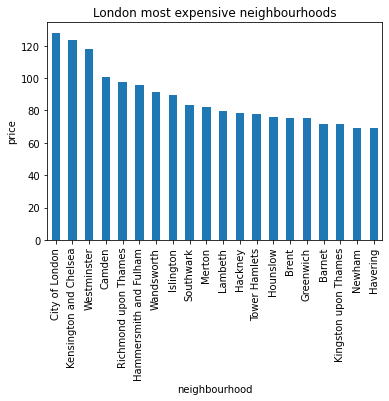

<Figure size 1440x720 with 0 Axes>

neighbourhood
City of London            128.002294
Kensington and Chelsea    123.820438
Westminster               118.056167
Camden                    100.744887
Richmond upon Thames       97.407115
Hammersmith and Fulham     95.723827
Wandsworth                 91.596966
Islington                  89.700959
Southwark                  83.168710
Merton                     82.272256
Lambeth                    79.748807
Hackney                    78.613972
Tower Hamlets              77.810292
Hounslow                   76.277048
Brent                      75.668358
Greenwich                  75.086196
Barnet                     71.605499
Kingston upon Thames       71.442460
Newham                     69.432387
Havering                   68.926641
Name: price, dtype: float64


In [ ]:
#show expensive neighbourhoods
df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:20].plot(kind='bar')
plt.title('London most expensive neighbourhoods')
plt.xlabel('neighbourhood')
plt.ylabel('price')
plt.xticks(rotation=90)
plt. tick_params(labelsize=10)
plt.figure(figsize=(20,10))
plt.show()

print(df_clean.groupby(['neighbourhood'])['price'].mean().sort_values(ascending=False)[:20])

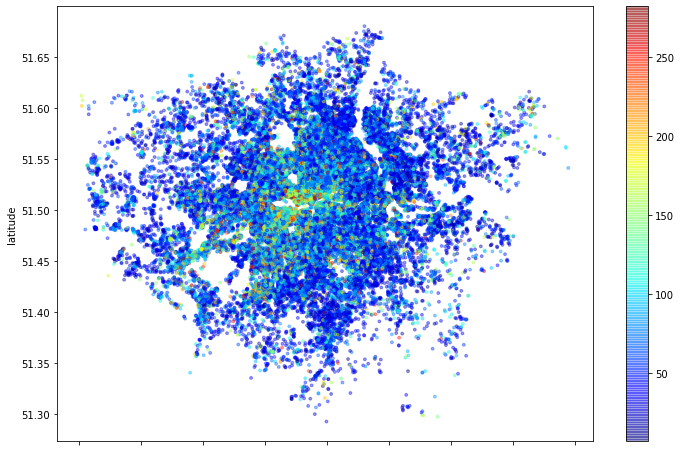

In [ ]:
#scatter map of airbnb prices by neighbourhood in London
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4,
c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

In [ ]:
#calculating the average price by property types
var = df_clean.groupby(['room_type']).price.mean().sort_values(ascending=False)[:10]
print(var)

room_type
Entire home/apt    119.030053
Hotel room         105.358121
Private room        49.205904
Shared room         48.486254
Name: price, dtype: float64


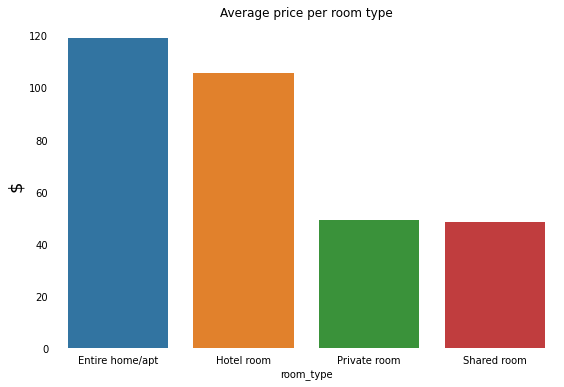

In [ ]:
#plotting the average price by type of property
ax = sns.barplot(var.index, var)
ax.set_title('Average price per room type')
ax.tick_params(bottom=False, top=False, left=False, right=False);
ax.set_ylabel('$', fontsize=18)
for kew, spine in ax.spines.items():
    spine.set_visible(False)
    
fig = plt.gcf()  # or by other means, like plt.subplots
figsize = fig.get_size_inches()
fig.set_size_inches(figsize * 1.5)  # scale current size by 1.5

In [ ]:
# function to get latitude and longitude

def latitude_longitude_locator(x):
    
    locator = Nominatim(user_agent = 'myGeocoder')

    location = locator.geocode(x)
    
    if location is None:
        None
    else:
        return location.longitude, location.latitude

# list of touristic locations

london_locations = [
                        'Croydon',                    
                        'Bexley',                     
                        'Hillingdon',                 
                        'Barking and Dagenham',       
                        'Sutton',                     
                        'Harrow',                     
                        'Redbridge',                  
                        'Lewisham',                   
                        'Bromley',                    
                        'Enfield',                    
                        'Waltham Forest',             
                        'Haringey',                   
                        'Ealing',                     
                        'Havering',                   
                        'Newham',                     
                        'Kingston upon Thames',       
                        'Barnet',                     
                        'Greenwich',                  
                        'Brent',                      
                        'Hounslow',                   
                        'Tower Hamlets',              
                        'Hackney',                    
                        'Lambeth',                    
                        'Merton',                     
                        'Southwark',                  
                        'Islington',                  
                        'Wandsworth',                 
                        'Hammersmith and Fulham',     
                        'Richmond upon Thames',       
                        'Camden',                    
                        'Westminster',               
                        'Kensington and Chelsea',    
                        'City of London',            
                                            ]

# get the geo data
london_locations_geo = {
                         x: latitude_longitude_locator(x) 
                         for x in london_locations 
                        }

# remove none data
london_locations_geo = {
                         k: v 
                         for k, v in london_locations_geo.items()
                         if v is not None
                        }

london_locations_geo

{'Croydon': (-0.101957, 51.3713049),
 'Bexley': (-82.936864, 39.9692378),
 'Hillingdon': (-0.44833493117949663, 51.542519299999995),
 'Barking and Dagenham': (0.15050434261994267, 51.5541171),
 'Sutton': (-100.6432359, 30.5672947),
 'Harrow': (-0.33731605402671094, 51.596827149999996),
 'Redbridge': (0.0454097, 51.5763203),
 'Lewisham': (-0.0101331, 51.4624325),
 'Bromley': (0.0148142, 51.4028046),
 'Enfield': (-0.0810175, 51.6520851),
 'Waltham Forest': (0.0100007, 51.5837553),
 'Haringey': (-0.10541010599099046, 51.587929849999995),
 'Ealing': (-0.3051952, 51.5126553),
 'Havering': (-0.14430716398919305, 51.5443851),
 'Newham': (0.02931796029382208, 51.52999955),
 'Kingston upon Thames': (-0.3062621, 51.4096275),
 'Barnet': (-0.2002261, 51.65309),
 'Greenwich': (-0.0045417, 51.4820845),
 'Brent': (-87.1647184, 32.9373463),
 'Hounslow': (-0.3613471, 51.4686132),
 'Tower Hamlets': (1.2986686, 51.1288633),
 'Hackney': (-0.0493621, 51.5432402),
 'Lambeth': (-0.117287, 51.5013012),
 'Mert

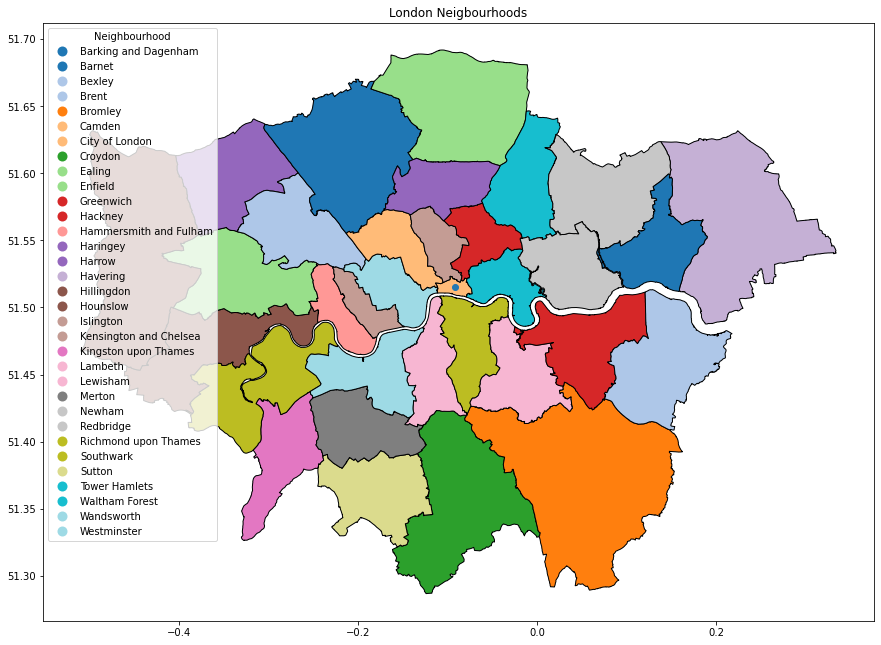

In [ ]:
#where is located the most expensive acomodation in London?
 
fig, ax = plt.subplots()
plt.rcParams['figure.figsize'] = [18, 11]

london_df.plot(
    ax = ax, 
    alpha = 0.8
    )

london_df.plot(
    ax = ax, 
    column = 'neighbourhood',
    categorical = True, 
    legend = True, 
    legend_kwds = {'title': 'Neighbourhood', 'loc': 'upper left'},
    cmap = 'tab20', 
    edgecolor = 'black',
    )

#for c in london_locations_geo.keys():
#    ax.text(
#        x=london_locations_geo[c][0],
#        y=london_locations_geo[c][1]+0.005,
#        s=c,
#        fontsize=3,
#        ha='center'
#    )
    
ax.plot(
    london_locations_geo[c][0],
    london_locations_geo[c][1],
    marker='o',
    alpha=5
    )
    
ax.set(
    title='London Neigbourhoods',
    aspect=1.5
    );